In [1]:
# import sys
# !{sys.executable} -m pip install -r requirements.txt
# # !python --version
# # !python -m pip install -r requirements.txt
# print("requirements installed \n running program...")

In [2]:
import sys
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 
import matplotlib as plt

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os


# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns 

windows_dir = "../kaggle/all/"
ubuntu_dir = "/home/prof/kaggle/unbankedcredit/kaggle/all/"

import platform

system = platform.system()

print("Notebook is running on operating system: {}".format(system))
if system == "Linux":
    directory = ubuntu_dir
else:
    directory = windows_dir

Notebook is running on operating system: Linux


In [3]:
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    


In [4]:
# Training data
#Parse single row to find the column name and the data type
train_file = "/home/prof/kaggle/unbankedcredit/train_all.csv"


def memory_reduction(data):
    dtypes = {}
    length_check = 0
    for column in data:
        length_check+=1
        
    integers = data.select_dtypes([int]) # select all columns of type integer eg 1
    floats = data.select_dtypes([float]) # select all columns of type float eg 1.0
    for inty in integers:
        dtypes[inty] = "int32" # set to 32 bit interger
    for floaty in floats:
        dtypes[floaty] = "float32" # set to 32 bit float
    
    if len(dtypes) != length_check:
        print("**********WARNING**********\n length check does not match.\n Likely contains non-float or non-int values")
    
    
    return dtypes
   
    


data = pd.read_csv(train_file, nrows=1)
for d in data:
    print(d)
dtype_dict = memory_reduction(data)



Unnamed: 0
SK_ID_CURR
NAME_CONTRACT_TYPE
FLAG_OWN_CAR
FLAG_OWN_REALTY
CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT_x
AMT_ANNUITY_x
AMT_GOODS_PRICE_x
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
OWN_CAR_AGE
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
CNT_FAM_MEMBERS
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
HOUR_APPR_PROCESS_START_x
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
EXT_SOURCE_1
EXT_SOURCE_2
EXT_SOURCE_3
APARTMENTS_AVG
BASEMENTAREA_AVG
YEARS_BEGINEXPLUATATION_AVG
YEARS_BUILD_AVG
COMMONAREA_AVG
ELEVATORS_AVG
ENTRANCES_AVG
FLOORSMAX_AVG
FLOORSMIN_AVG
LANDAREA_AVG
LIVINGAPARTMENTS_AVG
LIVINGAREA_AVG
NONLIVINGAPARTMENTS_AVG
NONLIVINGAREA_AVG
APARTMENTS_MODE
BASEMENTAREA_MODE
YEARS_BEGINEXPLUATATION_MODE
YEARS_BUILD_MODE
COMMONAREA_MODE
ELEVATORS_MODE
ENTRANCES_MODE
FLOORSMAX_MODE
FLOORSMIN_MODE


**********WARNING**********
 length check does not match.
 Likely contains non-float or non-int values


In [5]:
collist = ['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'ENTRANCES_MODE', 'LIVINGAPARTMENTS_MODE', 'YEARS_BEGINEXPLUATATION_MEDI',
           'ENTRANCES_MEDI', 'LIVINGAPARTMENTS_MEDI', 'FLAG_DOCUMENT_2','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_10', 
           'FLAG_DOCUMENT_12', 'NAME_INCOME_TYPE_Businessman', 'NAME_INCOME_TYPE_Student', 'ORGANIZATION_TYPE_Industry: type 6',
           'EXT_SOURCE_1_2_3_PRODUCT', 'EXT_SOURCE_1_3_PRODUCT', 'TARGET','ORGANIZATION_TYPE_Advertising', 'DAYS_CREDIT_mean', 
           'LIVINGAREA_MEDI', 'BASEMENTAREA_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG', 
           'LIVINGAREA_AVG', 'NONLIVINGAREA_MODE', 'ELEVATORS_AVG', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG', 'ELEVATORS_MEDI', 
          ]        
           


In [6]:
# train_file = "/home/prof/kaggle/unbankedcredit/train_enhanced_loan_history.csv"
# train_pd = pd.read_csv(train_file, low_memory=True, chunksize=100000, dtype=dtype_dict, usecols=collist)
train_pd = pd.read_csv(train_file, low_memory=True, dtype=dtype_dict)
train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 993 entries, Unnamed: 0 to AMT_ANNUITY_MAX_y
dtypes: bool(1), float32(819), int32(173)
memory usage: 1.1 GB


In [7]:
for x in train_pd:
    print(x)
    

Unnamed: 0
SK_ID_CURR
NAME_CONTRACT_TYPE
FLAG_OWN_CAR
FLAG_OWN_REALTY
CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT_x
AMT_ANNUITY_x
AMT_GOODS_PRICE_x
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
OWN_CAR_AGE
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
CNT_FAM_MEMBERS
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
HOUR_APPR_PROCESS_START_x
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
EXT_SOURCE_1
EXT_SOURCE_2
EXT_SOURCE_3
APARTMENTS_AVG
BASEMENTAREA_AVG
YEARS_BEGINEXPLUATATION_AVG
YEARS_BUILD_AVG
COMMONAREA_AVG
ELEVATORS_AVG
ENTRANCES_AVG
FLOORSMAX_AVG
FLOORSMIN_AVG
LANDAREA_AVG
LIVINGAPARTMENTS_AVG
LIVINGAREA_AVG
NONLIVINGAPARTMENTS_AVG
NONLIVINGAREA_AVG
APARTMENTS_MODE
BASEMENTAREA_MODE
YEARS_BEGINEXPLUATATION_MODE
YEARS_BUILD_MODE
COMMONAREA_MODE
ELEVATORS_MODE
ENTRANCES_MODE
FLOORSMAX_MODE
FLOORSMIN_MODE


Need to downcast data to smallest number of bits as large dataset is creating memory issues

In [8]:
# Test data
test_file = "/home/prof/kaggle/unbankedcredit/test_all.csv"
# collist.remove('TARGET')
# # test_pd = pd.read_csv(test_file, usecols=collist)
test_pd = pd.read_csv(test_file)
print('Training data shape: ', test_pd.shape)
test_pd.info()

Training data shape:  (48744, 992)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 992 entries, Unnamed: 0 to AMT_ANNUITY_MAX_y
dtypes: bool(1), float64(816), int64(175)
memory usage: 368.6 MB


Downcasting to save memory

In [9]:
train_pd = train_pd.apply(pd.to_numeric,errors="coerce", downcast="integer")




In [10]:
train_pd = train_pd.apply(pd.to_numeric,errors="coerce", downcast="float")

In [11]:
test_pd = test_pd.apply(pd.to_numeric,errors="coerce", downcast="integer")

In [12]:
test_pd = test_pd.apply(pd.to_numeric,errors="coerce", downcast="float")

In [13]:
train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 993 entries, Unnamed: 0 to AMT_ANNUITY_MAX_y
dtypes: bool(1), float32(820), int16(2), int8(170)
memory usage: 1013.2 MB


In [14]:
test_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 992 entries, Unnamed: 0 to AMT_ANNUITY_MAX_y
dtypes: bool(1), float32(817), int16(4), int8(170)
memory usage: 160.2 MB


Add one-hot encoding

In [15]:
# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in train_pd:
    print(col)
    if train_pd[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(train_pd[col].unique())) <= 2:
            # Train on the training data
            le.fit(train_pd[col])
            # Transform both training and testing data
            train_pd[col] = le.transform(train_pd[col])
            test_pd[col] = le.transform(test_pd[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

Unnamed: 0
SK_ID_CURR
NAME_CONTRACT_TYPE
FLAG_OWN_CAR
FLAG_OWN_REALTY
CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT_x
AMT_ANNUITY_x
AMT_GOODS_PRICE_x
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
OWN_CAR_AGE
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
CNT_FAM_MEMBERS
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
HOUR_APPR_PROCESS_START_x
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
EXT_SOURCE_1
EXT_SOURCE_2
EXT_SOURCE_3
APARTMENTS_AVG
BASEMENTAREA_AVG
YEARS_BEGINEXPLUATATION_AVG
YEARS_BUILD_AVG
COMMONAREA_AVG
ELEVATORS_AVG
ENTRANCES_AVG
FLOORSMAX_AVG
FLOORSMIN_AVG
LANDAREA_AVG
LIVINGAPARTMENTS_AVG
LIVINGAREA_AVG
NONLIVINGAPARTMENTS_AVG
NONLIVINGAREA_AVG
APARTMENTS_MODE
BASEMENTAREA_MODE
YEARS_BEGINEXPLUATATION_MODE
YEARS_BUILD_MODE
COMMONAREA_MODE
ELEVATORS_MODE
ENTRANCES_MODE
FLOORSMAX_MODE
FLOORSMIN_MODE


In [16]:
# one-hot encoding of categorical variables
train_pd = pd.get_dummies(train_pd)
test_pd = pd.get_dummies(test_pd)

train_data = train_pd
# # train_data = train_pd[['SK_ID_CURR','AMT_INCOME_TOTAL', 'TARGET', 'EXT_SOURCE_1_2_3_PRODUCT', 'TOTAL_OUTSTANDING_DEBT' ]]
# i = 0
# train_data = pd.DataFrame()

# # import 10 chunks for training

# for chunk in train_pd:
#     if i > 1:
#         break
#     else:
#         train_data = pd.concat([train_data, chunk])
#         i+=1
    
    

# # train_data = train_pd[te]

In [17]:
train_data.head(5).mean()

Unnamed: 0                              2.000000
SK_ID_CURR                         100004.400000
NAME_CONTRACT_TYPE                      0.200000
FLAG_OWN_CAR                            0.200000
FLAG_OWN_REALTY                         0.800000
CNT_CHILDREN                            0.000000
AMT_INCOME_TOTAL                   159300.000000
AMT_CREDIT_x                       532156.500000
AMT_ANNUITY_x                       23740.200000
AMT_GOODS_PRICE_x                  485100.000000
REGION_POPULATION_RELATIVE              0.013811
DAYS_BIRTH                         -16841.800000
DAYS_EMPLOYED                       -1625.400000
DAYS_REGISTRATION                   -4647.600000
DAYS_ID_PUBLISH                     -2167.400000
OWN_CAR_AGE                            26.000000
FLAG_MOBIL                              1.000000
FLAG_EMP_PHONE                          1.000000
FLAG_WORK_PHONE                         0.200000
FLAG_CONT_MOBILE                        1.000000
FLAG_PHONE          

In [18]:
# test_data = test_pd[['SK_ID_CURR','AMT_INCOME_TOTAL', 'EXT_SOURCE_1_2_3_PRODUCT', 'TOTAL_OUTSTANDING_DEBT' ]]
test_data = test_pd

Checking training and test data for consistency after one hot encoding

In [19]:
features = 0
for c in train_data:
    features +=1
print("number of train features is {}".format(features))

features = 0
for c in test_data:
    features +=1
print("number of test features is {}".format(features))

inconsistencies = []


for c in train_data:
    if c not in test_data:
        print("missing from test data {}".format(c))
    
        if c != "TARGET": # ignore column if it is the TARGET column
            inconsistencies.append(c)

number of train features is 993
number of test features is 992
missing from test data TARGET


In [20]:
print(inconsistencies)

[]


In [21]:
duplicates = {}
i = 1

for c in train_data:
    duplicates[c] = 1
    i+=1

for key,value in duplicates.items():
    if value > 1:
        print(key, value)
        
for c in test_data:
    duplicates[c] += 1
    i+=1
    

for key,value in duplicates.items():
    if value != 2:
        print(key, value)
        
        

TARGET 1


In [22]:
# print("dropping the following columns from train data {}".format(inconsistencies))
# train_data.drop(inconsistencies, inplace=True, axis=1)
# train_data.drop('NAME_CONTRACT_STATUS_XNA', inplace=True, axis=1)


In [23]:
duplicates = {}
i = 1

train_len = 0
test_len=0

for c in train_data:
    duplicates[c] = 1
    i+=1
    train_len+=1

for key,value in duplicates.items():
    if value > 1:
        print(key, value)
        
for c in test_data:
    duplicates[c] += 1
    i+=1
    test_len+=1
    

for key,value in duplicates.items():
    if value == 3:
        print(key, value)
print("train length is {}".format(train_len))
print("test length is {}".format(test_len))
sorted_list = sorted(list(duplicates), reverse=True)

train length is 993
test length is 992


In [24]:
train_data_cols = train_data.columns
test_data_cols = test_data.columns


In [25]:
differences = train_data_cols.difference(test_data_cols)

In [26]:
print(differences)

Index(['TARGET'], dtype='object')


In [27]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 993 entries, Unnamed: 0 to AMT_ANNUITY_MAX_y
dtypes: bool(1), float32(820), int16(2), int8(170)
memory usage: 1013.2 MB


In [28]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 992 entries, Unnamed: 0 to AMT_ANNUITY_MAX_y
dtypes: bool(1), float32(817), int16(4), int8(170)
memory usage: 160.2 MB


In [29]:
t_list = []
tr_list = []
for c in train_data:
    t_list.append(c)
    
for c in test_data:
    tr_list.append(c)

In [30]:
t_list.sort()
# tr_list.remove('ORGANIZATION_TYPE_Industry: type 1')
# t_list.remove('NAME_CONTRACT_STATUS_Canceled')
# t_list.remove('TARGET')
tr_list.remove('NAME_CONTRACT_STATUS_Canceled')

tr_list.sort()

In [31]:
for t,r in zip(t_list,tr_list):
    if t != r:
        print("******************CHECK************************************************")
    print(t,r)
print("finished checking")

AMT_ANNUITY_MAX AMT_ANNUITY_MAX
AMT_ANNUITY_MAX_x AMT_ANNUITY_MAX_x
AMT_ANNUITY_MAX_y AMT_ANNUITY_MAX_y
AMT_ANNUITY_MEAN AMT_ANNUITY_MEAN
AMT_ANNUITY_MEDIAN_x AMT_ANNUITY_MEDIAN_x
AMT_ANNUITY_MEDIAN_y AMT_ANNUITY_MEDIAN_y
AMT_ANNUITY_SUM AMT_ANNUITY_SUM
AMT_ANNUITY_mean AMT_ANNUITY_mean
AMT_ANNUITY_sum AMT_ANNUITY_sum
AMT_ANNUITY_x AMT_ANNUITY_x
AMT_ANNUITY_y AMT_ANNUITY_y
AMT_APPLICATION AMT_APPLICATION
AMT_APPLICATION_MAX AMT_APPLICATION_MAX
AMT_APPLICATION_MEAN AMT_APPLICATION_MEAN
AMT_APPLICATION_SUM AMT_APPLICATION_SUM
AMT_BALANCE_CREDIT_RATIO_MEANS AMT_BALANCE_CREDIT_RATIO_MEANS
AMT_BALANCE_CREDIT_RATIO_SUMS AMT_BALANCE_CREDIT_RATIO_SUMS
AMT_BALANCE_MEANS AMT_BALANCE_MEANS
AMT_BALANCE_SUMS AMT_BALANCE_SUMS
AMT_CREDIT_LIMIT_ACTUAL_MEANS AMT_CREDIT_LIMIT_ACTUAL_MEANS
AMT_CREDIT_LIMIT_ACTUAL_SUMS AMT_CREDIT_LIMIT_ACTUAL_SUMS
AMT_CREDIT_MAX AMT_CREDIT_MAX
AMT_CREDIT_MAX_OVERDUE_MAX AMT_CREDIT_MAX_OVERDUE_MAX
AMT_CREDIT_MAX_OVERDUE_MEDIAN_x AMT_CREDIT_MAX_OVERDUE_MEDIAN_x
AMT_CREDIT_M

Looks like test_data has no ORGANIZATION_TYPE_Industry: type 1 - but isn't being found in tests as name is subset of 

ORGANIZATION_TYPE_Industry: type 10



Test contains NAME_CONTRACT_STATUS_Canceled

In [32]:
# train_data.drop(columns='NAME_CONTRACT_STATUS_Canceled',inplace=True)

In [33]:
test_data.drop(columns="NAME_CONTRACT_STATUS_Canceled", inplace=True)

In [34]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 993 entries, Unnamed: 0 to AMT_ANNUITY_MAX_y
dtypes: bool(1), float32(820), int16(2), int8(170)
memory usage: 1013.2 MB


In [35]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 991 entries, Unnamed: 0 to AMT_ANNUITY_MAX_y
dtypes: bool(1), float32(816), int16(4), int8(170)
memory usage: 160.1 MB


In [36]:
t_list = []
tr_list = []
for c in train_data:
    t_list.append(c)
    
for c in test_data:
    tr_list.append(c)
    
t_list.sort()
# tr_list.remove('ORGANIZATION_TYPE_Industry: type 1')
# t_list.remove('NAME_CONTRACT_STATUS_Canceled')

# tr_list.remove('NAME_CONTRACT_STATUS_Canceled')

tr_list.sort()

In [37]:
try:
    t_list.remove('TARGET') # after removing TARGET lists should be the same length

except:
    print("TARGET not in list")

ti = 0 # train mask to print out differences
tri = 0 # test mask to print out differences
maximum = max(len(t_list), len(tr_list)) # pick longest list
# pick longer list


for x in range(maximum):
    if t_list[ti] != tr_list[tri]:
        print("******************CHECK************************************************")
        # look ahead to see if next item matches current
        
    
        if t_list[ti+1] == tr_list[tri]: # look ahead to next item in training and compare with test
            tri-=1
        elif t_list[ti] == tr_list[tri+1]: # look ahead to next item in test and compare
            ti-=1
        else:
            print("unable to reconcile.\n Moving on....")
    print(t_list[ti],tr_list[tri])
    ti+=1
    tri+=1
print("finished checking")

AMT_ANNUITY_MAX AMT_ANNUITY_MAX
AMT_ANNUITY_MAX_x AMT_ANNUITY_MAX_x
AMT_ANNUITY_MAX_y AMT_ANNUITY_MAX_y
AMT_ANNUITY_MEAN AMT_ANNUITY_MEAN
AMT_ANNUITY_MEDIAN_x AMT_ANNUITY_MEDIAN_x
AMT_ANNUITY_MEDIAN_y AMT_ANNUITY_MEDIAN_y
AMT_ANNUITY_SUM AMT_ANNUITY_SUM
AMT_ANNUITY_mean AMT_ANNUITY_mean
AMT_ANNUITY_sum AMT_ANNUITY_sum
AMT_ANNUITY_x AMT_ANNUITY_x
AMT_ANNUITY_y AMT_ANNUITY_y
AMT_APPLICATION AMT_APPLICATION
AMT_APPLICATION_MAX AMT_APPLICATION_MAX
AMT_APPLICATION_MEAN AMT_APPLICATION_MEAN
AMT_APPLICATION_SUM AMT_APPLICATION_SUM
AMT_BALANCE_CREDIT_RATIO_MEANS AMT_BALANCE_CREDIT_RATIO_MEANS
AMT_BALANCE_CREDIT_RATIO_SUMS AMT_BALANCE_CREDIT_RATIO_SUMS
AMT_BALANCE_MEANS AMT_BALANCE_MEANS
AMT_BALANCE_SUMS AMT_BALANCE_SUMS
AMT_CREDIT_LIMIT_ACTUAL_MEANS AMT_CREDIT_LIMIT_ACTUAL_MEANS
AMT_CREDIT_LIMIT_ACTUAL_SUMS AMT_CREDIT_LIMIT_ACTUAL_SUMS
AMT_CREDIT_MAX AMT_CREDIT_MAX
AMT_CREDIT_MAX_OVERDUE_MAX AMT_CREDIT_MAX_OVERDUE_MAX
AMT_CREDIT_MAX_OVERDUE_MEDIAN_x AMT_CREDIT_MAX_OVERDUE_MEDIAN_x
AMT_CREDIT_M

NAME_CASH_LOAN_PURPOSE_Everyday expenses_SUM NAME_CASH_LOAN_PURPOSE_Everyday expenses_SUM
NAME_CASH_LOAN_PURPOSE_Furniture NAME_CASH_LOAN_PURPOSE_Furniture
NAME_CASH_LOAN_PURPOSE_Furniture_MAX NAME_CASH_LOAN_PURPOSE_Furniture_MAX
NAME_CASH_LOAN_PURPOSE_Furniture_MEAN NAME_CASH_LOAN_PURPOSE_Furniture_MEAN
NAME_CASH_LOAN_PURPOSE_Furniture_SUM NAME_CASH_LOAN_PURPOSE_Furniture_SUM
NAME_CASH_LOAN_PURPOSE_Gasification / water supply NAME_CASH_LOAN_PURPOSE_Gasification / water supply
NAME_CASH_LOAN_PURPOSE_Gasification / water supply_MAX NAME_CASH_LOAN_PURPOSE_Gasification / water supply_MAX
NAME_CASH_LOAN_PURPOSE_Gasification / water supply_MEAN NAME_CASH_LOAN_PURPOSE_Gasification / water supply_MEAN
NAME_CASH_LOAN_PURPOSE_Gasification / water supply_SUM NAME_CASH_LOAN_PURPOSE_Gasification / water supply_SUM
NAME_CASH_LOAN_PURPOSE_Hobby NAME_CASH_LOAN_PURPOSE_Hobby
NAME_CASH_LOAN_PURPOSE_Hobby_MAX NAME_CASH_LOAN_PURPOSE_Hobby_MAX
NAME_CASH_LOAN_PURPOSE_Hobby_MEAN NAME_CASH_LOAN_PURPOSE_Hobby

In [38]:
train_data.drop(columns='NAME_CONTRACT_STATUS_Canceled', inplace=True)


In [39]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 992 entries, Unnamed: 0 to AMT_ANNUITY_MAX_y
dtypes: bool(1), float32(819), int16(2), int8(170)
memory usage: 1012.1 MB


In [40]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 991 entries, Unnamed: 0 to AMT_ANNUITY_MAX_y
dtypes: bool(1), float32(816), int16(4), int8(170)
memory usage: 160.1 MB


In [41]:
# from sklearn import preprocessing 
# Y_imputed=preprocessing.Imputer().fit_transform(test_data) 
# Y_imputed.shape

In [42]:
from sklearn.preprocessing import MinMaxScaler, Imputer

train_labels = train_data['TARGET']

# Drop the target from the training data
if 'TARGET' in train_data:
    train = train_data.drop(columns = ['TARGET'])
else:
    train = train_data.copy()
    
# Feature names
features = list(train_data.columns)

# Copy of the testing data
test = test_data.copy()

# Median imputation of missing values
imputer = Imputer(strategy = 'median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit on the training data
imputer.fit(train)

# Transform both training and testing data
train_model = imputer.transform(train)
test_model = imputer.transform(test)


# Repeat with the scaler
scaler.fit(train_model)
s_train = scaler.transform(train_model)
s_test = scaler.transform(test_model)

print('Training data shape: ', s_train.shape)
print('Testing data shape: ', s_test.shape)

Training data shape:  (307511, 990)
Testing data shape:  (48744, 990)


In [43]:
from sklearn.linear_model import LogisticRegression

# Make the model with the specified regularization parameter
log_reg = LogisticRegression(C = 0.0001, class_weight="balanced") # balancing class weights as data is highly unbalanced between defaults and payers

# Train on the training data
log_reg.fit(s_train, train_labels)

LogisticRegression(C=0.0001, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [44]:
log_reg.score(s_train, train_labels)

0.6789383144017612

In [45]:
# Make predictions
# Make sure to select the second column only
log_reg_train_pred = log_reg.predict(s_train)


Confusion matrix, without normalization
[[192088  90598]
 [  8132  16693]]
Normalized confusion matrix
[[0.68 0.32]
 [0.33 0.67]]


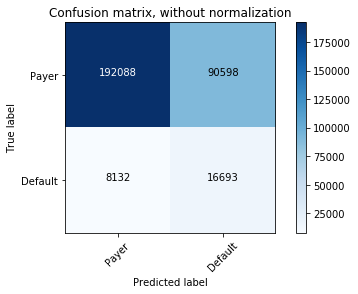

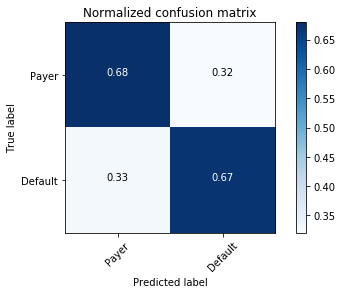

In [46]:
class_names = ["Payer", "Default"]

# Compute confusion matrix
cnf_matrix = confusion_matrix(train_labels,log_reg_train_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

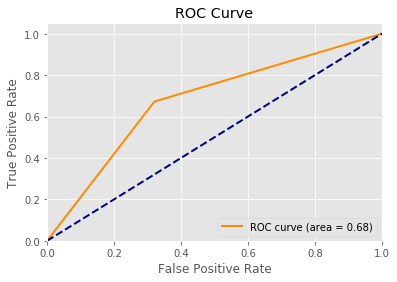

In [47]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

# y_predict_probabilities = clf.predict(X_test)[:,1]

fpr, tpr, _ = roc_curve(train_labels, log_reg_train_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [48]:
log_reg_pred = log_reg.predict_proba(s_test)[:, 1]

In [49]:
# Submission dataframe
submit = test_data[['SK_ID_CURR']]
submit['TARGET'] = log_reg_pred

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [50]:
submit

,SK_ID_CURR,TARGET
0,100001.0,0.395068
1,100005.0,0.692852
2,100013.0,0.296878
3,100028.0,0.370651
4,100038.0,0.662052
5,100042.0,0.311919
6,100057.0,0.324720
7,100065.0,0.499925
8,100066.0,0.329928
9,100067.0,0.653350


In [51]:
# # Save the submission to a csv file
# submit.to_csv('log_reg_baseline_with_credit_product_history_enhanced.csv', index = False)

In [52]:
# X = train_model # training data without scaler
X = s_train # training data with scaler
y = train_labels

In [53]:
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification

clf = LinearSVC(random_state=0)
clf.fit(X, y)
LinearSVC(C = 0.0001, class_weight="balanced", dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=1000, tol=0.0001,
     verbose=0)
# print(clf.coef_)
# print(clf.intercept_)



LinearSVC(C=0.0001, class_weight='balanced', dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=1000, tol=0.0001,
     verbose=0)

In [54]:
clf.score(X,y)

0.9193329669507757

In [55]:
predictions = clf.decision_function(s_test)

In [56]:
predict = clf.predict(X)

Confusion matrix, without normalization
[[282673     13]
 [ 24793     32]]
Normalized confusion matrix
[[1.00e+00 4.60e-05]
 [9.99e-01 1.29e-03]]


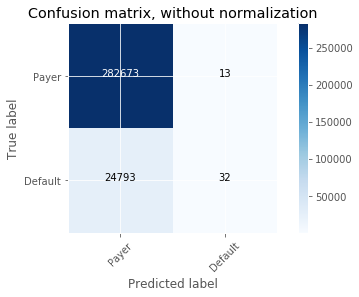

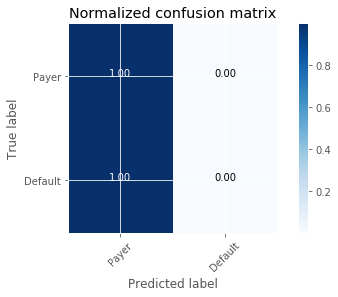

In [57]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y,predict)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

ROC Curve

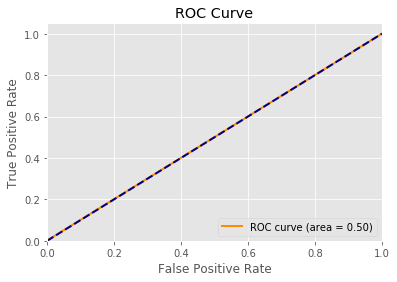

In [58]:
# y_predict_probabilities = clf.predict(X_test)[:,1]

fpr, tpr, _ = roc_curve(y, predict)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [59]:
clf.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': True,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'loss': 'squared_hinge',
 'max_iter': 1000,
 'multi_class': 'ovr',
 'penalty': 'l2',
 'random_state': 0,
 'tol': 0.0001,
 'verbose': 0}

In [85]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import lightgbm as lgb
import gc

def model(features, test_features, encoding = 'ohe', n_folds = 5):
    
    """Train and test a light gradient boosting model using
    cross validation. 
    
    Parameters
    --------
        features (pd.DataFrame): 
            dataframe of training features to use 
            for training a model. Must include the TARGET column.
        test_features (pd.DataFrame): 
            dataframe of testing features to use
            for making predictions with the model. 
        encoding (str, default = 'ohe'): 
            method for encoding categorical variables. Either 'ohe' for one-hot encoding or 'le' for integer label encoding
            n_folds (int, default = 5): number of folds to use for cross validation
        
    Return
    --------
        submission (pd.DataFrame): 
            dataframe with `SK_ID_CURR` and `TARGET` probabilities
            predicted by the model.
        feature_importances (pd.DataFrame): 
            dataframe with the feature importances from the model.
        valid_metrics (pd.DataFrame): 
            dataframe with training and validation metrics (ROC AUC) for each fold and overall.
        
    """
    
    # Extract the ids
    train_ids = features['SK_ID_CURR']
    test_ids = test_features['SK_ID_CURR']
    
    # Extract the labels for training
    labels = features['TARGET']
    
    # Remove the ids and target
    features = features.drop(columns = ['SK_ID_CURR', 'TARGET'])
    test_features = test_features.drop(columns = ['SK_ID_CURR'])
    
    
    # One Hot Encoding
    if encoding == 'ohe':
        features = pd.get_dummies(features)
        test_features = pd.get_dummies(test_features)
        
        # Align the dataframes by the columns
        features, test_features = features.align(test_features, join = 'inner', axis = 1)
        
        # No categorical indices to record
        cat_indices = 'auto'
    
    # Integer label encoding
    elif encoding == 'le':
        
        # Create a label encoder
        label_encoder = LabelEncoder()
        
        # List for storing categorical indices
        cat_indices = []
        
        # Iterate through each column
        for i, col in enumerate(features):
            if features[col].dtype == 'object':
                # Map the categorical features to integers
                features[col] = label_encoder.fit_transform(np.array(features[col].astype(str)).reshape((-1,)))
                test_features[col] = label_encoder.transform(np.array(test_features[col].astype(str)).reshape((-1,)))

                # Record the categorical indices
                cat_indices.append(i)
    
    # Catch error if label encoding scheme is not valid
    else:
        raise ValueError("Encoding must be either 'ohe' or 'le'")
        
    print('Training Data Shape: ', features.shape)
    print('Testing Data Shape: ', test_features.shape)
    
    # Extract feature names
    feature_names = list(features.columns)
    
    # Convert to np arrays
    features = np.array(features)
    test_features = np.array(test_features)
    
    # Create the kfold object
    k_fold = KFold(n_splits = n_folds, shuffle = True, random_state = 50)
    
    # Empty array for feature importances
    feature_importance_values = np.zeros(len(feature_names))
    
    # Empty array for test predictions
    test_predictions = np.zeros(test_features.shape[0])
    
    # Empty array for out of fold validation predictions
    out_of_fold = np.zeros(features.shape[0])
    
    # Lists for recording validation and training scores
    valid_scores = []
    train_scores = []
    
    params = {'num_iterations': 1000,
             'max_bin': 4 }
    
    # Iterate through each fold
    for train_indices, valid_indices in k_fold.split(features):
        
        # Training data for the fold
        train_features, train_labels = features[train_indices], labels[train_indices]
        # Validation data for the fold
        valid_features, valid_labels = features[valid_indices], labels[valid_indices]
        
        # Create the model
        model = lgb.LGBMClassifier(n_estimators=10000, objective = 'binary', 
                                   class_weight = 'balanced',  learning_rate = 0.0005, 
                                   reg_alpha = 0.1, reg_lambda = 0.1, max_bin = 900, 
                                   subsample = 0.8, n_jobs = -1, random_state = 50)
        
        # Train the model
        model.fit(train_features, train_labels, eval_metric = 'auc',
                  eval_set = [(valid_features, valid_labels), (train_features, train_labels)],
                  eval_names = ['valid', 'train'], categorical_feature = cat_indices,
                  early_stopping_rounds = 1000, verbose = 200)
        
        # Record the best iteration
        best_iteration = model.best_iteration_
        
        # Record the feature importances
        feature_importance_values += model.feature_importances_ / k_fold.n_splits
        
        # Make predictions
        test_predictions += model.predict_proba(test_features, num_iteration = best_iteration)[:, 1] / k_fold.n_splits
        
        # Record the out of fold predictions
        out_of_fold[valid_indices] = model.predict_proba(valid_features, num_iteration = best_iteration)[:, 1]
        
        # Record the best score
        valid_score = model.best_score_['valid']['auc']
        train_score = model.best_score_['train']['auc']
        
        valid_scores.append(valid_score)
        train_scores.append(train_score)
        
        # Clean up memory
        gc.enable()
        del model, train_features, valid_features
        gc.collect()
        
    # Make the submission dataframe
    submission = pd.DataFrame({'SK_ID_CURR': test_ids, 'TARGET': test_predictions})
    
    # Make the feature importance dataframe
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importance_values})
    
    # Overall validation score
    valid_auc = roc_auc_score(labels, out_of_fold)
    
    # Add the overall scores to the metrics
    valid_scores.append(valid_auc)
    train_scores.append(np.mean(train_scores))
    
    # Needed for creating dataframe of validation scores
    fold_names = list(range(n_folds))
    fold_names.append('overall')
    
    # Dataframe of validation scores
    metrics = pd.DataFrame({'fold': fold_names,
                            'train': train_scores,
                            'valid': valid_scores}) 
    
    return submission, feature_importances, metrics



In [83]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 991 entries, Unnamed: 0 to AMT_ANNUITY_MAX_y
dtypes: bool(1), float32(816), int16(4), int8(170)
memory usage: 160.1 MB


In [86]:
submission, fi, metrics = model(train_data, test_data)
print('Baseline metrics')
print(metrics)

Training Data Shape:  (307511, 990)
Testing Data Shape:  (48744, 990)
Training until validation scores don't improve for 1000 rounds.
[200]	valid's auc: 0.721894	train's auc: 0.733785
[400]	valid's auc: 0.724878	train's auc: 0.737368
[600]	valid's auc: 0.728153	train's auc: 0.740176
[800]	valid's auc: 0.730119	train's auc: 0.742152
[1000]	valid's auc: 0.731992	train's auc: 0.743995
[1200]	valid's auc: 0.733521	train's auc: 0.745727
[1400]	valid's auc: 0.734941	train's auc: 0.747443
[1600]	valid's auc: 0.736372	train's auc: 0.749161
[1800]	valid's auc: 0.737589	train's auc: 0.750709
[2000]	valid's auc: 0.739415	train's auc: 0.752776
[2200]	valid's auc: 0.740955	train's auc: 0.754612
[2400]	valid's auc: 0.742565	train's auc: 0.756609
[2600]	valid's auc: 0.744195	train's auc: 0.758829
[2800]	valid's auc: 0.745833	train's auc: 0.761109
[3000]	valid's auc: 0.747332	train's auc: 0.763262
[3200]	valid's auc: 0.748764	train's auc: 0.765301
[3400]	valid's auc: 0.750155	train's auc: 0.767174
[36

KeyboardInterrupt: 

In [64]:
submission = submission.astype({'SK_ID_CURR': 'int32', 'TARGET': 'float64'})
submission.to_csv('all_lgb_median_max1.csv', index = False)

In [76]:
submission.head()

0    100001
1    100005
2    100013
3    100028
4    100038
Name: SK_ID_CURR, dtype: int32

increasing max_bin (values of features) seems to improve accuracy. removing early stopping as tests were not maxing out before hitting the early stop. 

KeyError: 'Only the Series name can be used for the key in Series dtype mappings.'

0    100001
1    100005
2    100013
3    100028
4    100038
Name: SK_ID_CURR, dtype: int32